In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import operator


In [6]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

data = pd.DataFrame({'X': x, 'Y': y})
data

,X,Y
0,-3.292157,-40.159990
1,0.799528,-7.266693
2,-0.936214,-9.910956
3,-4.722680,-102.088515
4,-3.602674,-59.460584
...,...,...
95,-0.119720,-3.663882
96,1.968500,-2.652152
97,-3.357611,-45.360317
98,1.619264,1.987808


In [7]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(data[['X']])

model = LinearRegression()
model.fit(x_poly, data['Y'])
data['Y_Pred'] = model.predict(x_poly)

mse = mean_squared_error(data['Y'], data['Y_Pred'])
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 9.441753281785719


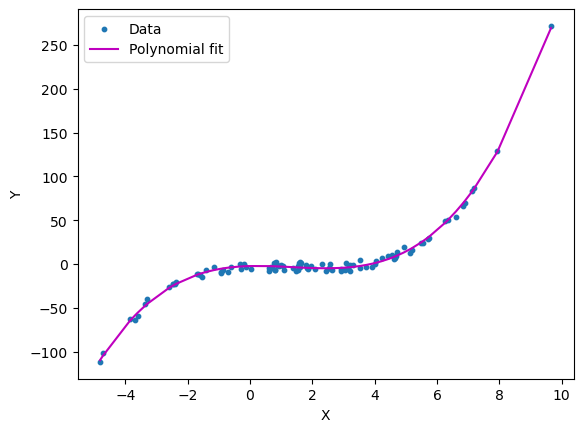

In [8]:
plt.scatter(data['X'], data['Y'], s=10, label='Data')
# Sort the values of x before line plot
data = data.sort_values(by='X')
plt.plot(data['X'], data['Y_Pred'], color='m', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
